In [97]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio
import sys

df = pd.read_csv('adience/labels.csv')
n = len(df)
print(n)

df.head()

19370


,id,use,fold,sex_m,sex_f,age_class_0,age_class_1,age_class_2,age_class_3,age_class_4,age_class_5,age_class_6,age_class_7,id_orig,box_x,box_y,box_s
0,00000.jpg,0,0,0.0,1.0,0,0,0,0,1,0,0,0,adience/faces/30601258@N03/coarse_tilt_aligned...,-1,-1,-1
1,00001.jpg,1,0,1.0,0.0,0,0,0,0,1,0,0,0,adience/faces/30601258@N03/coarse_tilt_aligned...,103,102,382
2,00002.jpg,1,0,0.0,1.0,0,0,0,0,1,0,0,0,adience/faces/30601258@N03/coarse_tilt_aligned...,115,100,370
3,00003.jpg,0,0,1.0,0.0,0,0,0,0,1,0,0,0,adience/faces/30601258@N03/coarse_tilt_aligned...,-1,-1,-1
4,00004.jpg,1,0,1.0,0.0,0,0,0,0,1,0,0,0,adience/faces/30601258@N03/coarse_tilt_aligned...,133,111,349


In [99]:
# PREPARE EXPORT TO MAT

output_size = 128
file_name = 'adience/images'+str(output_size)+'rgb.mat'

sample_size = n
imgs = np.full((sample_size, output_size, output_size, 3), 0)
for i in range(0, sample_size):
    if i%500==0: sys.stdout.write(str(i)+', ')
    if df['use'][i]==1:
        imgs[i] = cv2.resize(
            src=cv2.imread(df['id_orig'][i])
                [df['box_x'][i]:df['box_x'][i]+df['box_s'][i],
                df['box_y'][i]:df['box_y'][i]+df['box_s'][i]],
            dsize=(output_size,output_size),
            interpolation=cv2.INTER_CUBIC
        )

0, 

500, 

1000, 

1500, 

2000, 

2500, 

3000, 

3500, 

4000, 

4500, 

5000, 

5500, 

6000, 

6500, 

7000, 

7500, 

8000, 

8500, 

9000, 

9500, 

10000, 

10500, 

11000, 

11500, 

12000, 

12500, 

13000, 

13500, 

14000, 

14500, 

15000, 

15500, 

16000, 

16500, 

17000, 

17500, 

18000, 

18500, 

19000, 

1


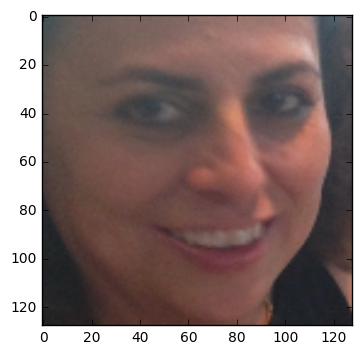

In [101]:
# TEST NP ARRAY

%matplotlib inline
i = 6
print(df['use'][i])
plt.imshow(imgs[i][...,::-1]/255.0)
#plt.imshow(plt.imread('test.png'))

In [102]:
# EXPORT TO MAT

imgs8 = np.asarray(a=imgs, dtype=np.uint8)
sio.savemat(file_name=file_name, mdict={'images': imgs8})

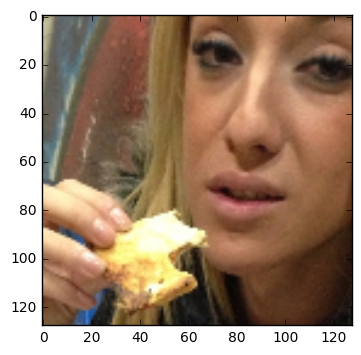

In [105]:
# TEST IMPORT

inmat = sio.loadmat(file_name)
plt.imshow(inmat['images'][5][...,::-1])

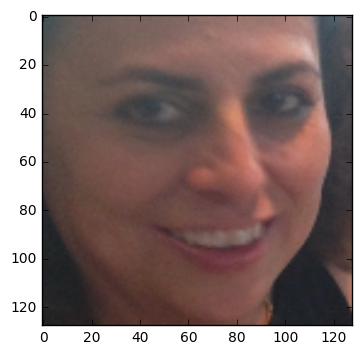

In [91]:
# TEST COLOR IMAGE

%matplotlib inline
i = 6
output_size = 128
img = cv2.resize(
        src=cv2.imread(df['id_orig'][i])
            [df['box_x'][i]:df['box_x'][i]+df['box_s'][i],
            df['box_y'][i]:df['box_y'][i]+df['box_s'][i]],
        dsize=(output_size,output_size),
        interpolation=cv2.INTER_CUBIC
    )
plt.imshow(img[...,::-1])

In [57]:
# EXPORT TO JPEG FOLDER

output_size = 48
folder_name = 'adience/faces'+str(output_size)+'g/'
for i in range(0, n):
    if i%100==0:
        sys.stdout.write(str(i)+", ")
    if df['use'][i]==1:
        cv2.imwrite(
            filename=folder_name+df['id'][i],
            img=cv2.resize(
                src=cv2.cvtColor(
                    src=cv2.imread(df['id_orig'][i]),
                    code=cv2.COLOR_BGR2GRAY)
                    [df['box_x'][i]:df['box_x'][i]+df['box_s'][i],
                    df['box_y'][i]:df['box_y'][i]+df['box_s'][i]],
                dsize=(output_size,output_size),
                interpolation=cv2.INTER_CUBIC),
            params=(cv2.IMWRITE_JPEG_QUALITY,100)
        )

0, 

100, 

200, 

300, 

400, 

500, 

600, 

700, 

800, 

900, 

1000, 

1100, 

1200, 

1300, 

1400, 

1500, 

1600, 

1700, 

1800, 

1900, 

2000, 

2100, 

2200, 

2300, 

2400, 

2500, 

2600, 

2700, 

2800, 

2900, 

3000, 

3100, 

3200, 

3300, 

3400, 

3500, 

3600, 

3700, 

3800, 

3900, 

4000, 

4100, 

4200, 

4300, 

4400, 

4500, 

4600, 

4700, 

4800, 

4900, 

5000, 

5100, 

5200, 

5300, 

5400, 

5500, 

5600, 

5700, 

5800, 

5900, 

6000, 

6100, 

6200, 

6300, 

6400, 

6500, 

6600, 

6700, 

6800, 

6900, 

7000, 

7100, 

7200, 

7300, 

7400, 

7500, 

7600, 

7700, 

7800, 

7900, 

8000, 

8100, 

8200, 

8300, 

8400, 

8500, 

8600, 

8700, 

8800, 

8900, 

9000, 

9100, 

9200, 

9300, 

9400, 

9500, 

9600, 

9700, 

9800, 

9900, 

10000, 

10100, 

10200, 

10300, 

10400, 

10500, 

10600, 

10700, 

10800, 

10900, 

11000, 

11100, 

11200, 

11300, 

11400, 

11500, 

11600, 11700, 11800, 11900, 12000, 12100, 

12200, 

12300, 

12400, 

12500, 

12600, 

12700, 

12800, 

12900, 

13000, 

13100, 

13200, 

13300, 

13400, 

13500, 

13600, 

13700, 

13800, 

13900, 

14000, 

14100, 

14200, 

14300, 

14400, 

14500, 

14600, 

14700, 

14800, 

14900, 

15000, 

15100, 

15200, 

15300, 

15400, 

15500, 

15600, 

15700, 

15800, 

15900, 

16000, 

16100, 

16200, 

16300, 

16400, 

16500, 

16600, 

16700, 

16800, 

16900, 

17000, 

17100, 

17200, 

17300, 

17400, 

17500, 

17600, 

17700, 

17800, 

17900, 

18000, 

18100, 

18200, 

18300, 

18400, 

18500, 

18600, 

18700, 

18800, 

18900, 

19000, 

19100, 

19200, 

19300, 

In [55]:
# TESTING JPEG WRITE

i = 7;
print(df['box_s'][i]);
cv2.imwrite(
    filename=folder_name+'test.jpg',
    img=cv2.resize(
        src=cv2.cvtColor(
            src=cv2.imread(df['id_orig'][i]),
            code=cv2.COLOR_BGR2GRAY)
            [df['box_x'][i]:df['box_x'][i]+df['box_s'][i],
            df['box_y'][i]:df['box_y'][i]+df['box_s'][i]],
        dsize=(output_size,output_size),
        interpolation=cv2.INTER_CUBIC),
    params=(cv2.IMWRITE_JPEG_QUALITY,100)
);

342
